# NetBench Minimal Plots (single-folder utilities)

Reads `../data/csv/summary_all.csv` and makes quick charts.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

summary_path = '../data/csv/summary_all.csv'
df = pd.read_csv(summary_path)
if df.empty:
    raise SystemExit("summary_all.csv is empty. Run the scripts first.")
display(df.head())


,ts,ts_iso,mode,baseUrl,count,totalTime_s,totalBytes_B,wifiBytes_B,cellBytes_B,success,fail
0,1757240707311,2025-09-07T10:25:07.311000Z,WIFI_ONLY,http://139.224.130.188/images,50,9.890,68265283,68265283,0,50,0
1,1757240715826,2025-09-07T10:25:15.826000Z,WIFI_ONLY,http://139.224.130.188/images,50,8.513,68265283,68265283,0,50,0
2,1757240722804,2025-09-07T10:25:22.804000Z,WIFI_ONLY,http://139.224.130.188/images,50,6.977,68265283,68265283,0,50,0
3,1757240729437,2025-09-07T10:25:29.437000Z,WIFI_ONLY,http://139.224.130.188/images,50,6.632,68265283,68265283,0,50,0
4,1757240902770,2025-09-07T10:28:22.770000Z,WIFI_ONLY,http://139.224.130.188/images,50,173.331,63199723,63199723,0,48,2


## Boxplot: Total Time by Mode

C:\Users\legion\AppData\Local\Temp\ipykernel_11044\1078096970.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=modes, showmeans=True)


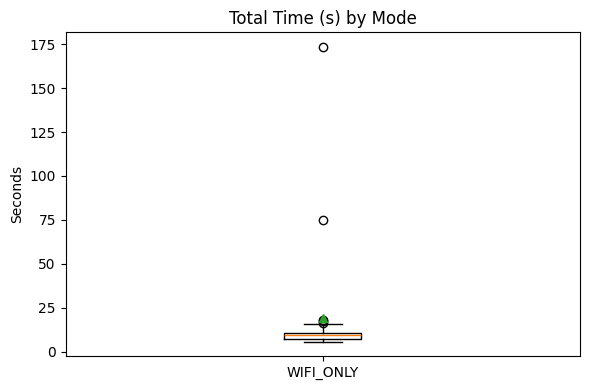

In [2]:
modes = sorted(df['mode'].unique().tolist())
data = [df[df['mode']==m]['totalTime_s'] for m in modes]

plt.figure(figsize=(6,4))
plt.boxplot(data, labels=modes, showmeans=True)
plt.title('Total Time (s) by Mode')
plt.ylabel('Seconds')
plt.tight_layout()
plt.show()


## Bar Chart: Mean Total Time per Mode

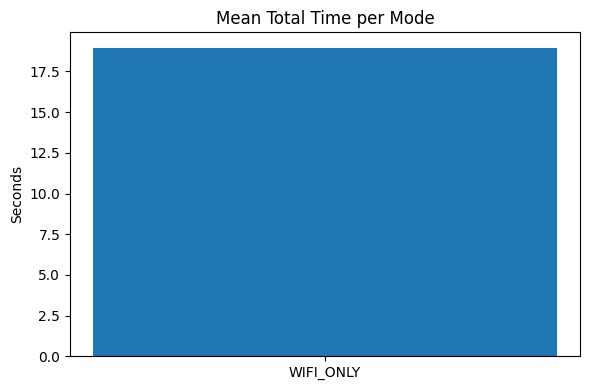

In [3]:
g = df.groupby('mode')['totalTime_s'].mean().reset_index()
plt.figure(figsize=(6,4))
plt.bar(g['mode'], g['totalTime_s'])
plt.title('Mean Total Time per Mode')
plt.ylabel('Seconds')
plt.tight_layout()
plt.show()


## Bar Chart: Mean Cellular Share (%) per Mode

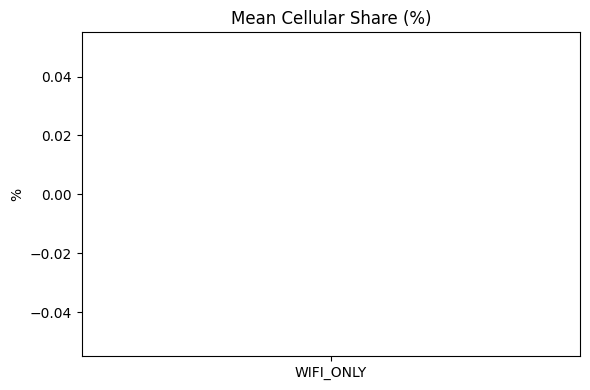

In [4]:
df['cell_share_pct'] = (df['cellBytes_B'] / df['totalBytes_B']).fillna(0) * 100.0
g2 = df.groupby('mode')['cell_share_pct'].mean().reset_index()
plt.figure(figsize=(6,4))
plt.bar(g2['mode'], g2['cell_share_pct'])
plt.title('Mean Cellular Share (%)')
plt.ylabel('%')
plt.tight_layout()
plt.show()
